# 이상치 데이터 처리 
- 피처/특성에 데이터 값의 범위를 벗어나는 데이터를 의미
- 종류 : 잘못입력된 경우, 자연으로 생성된 데이터
    - 잘못 입력된 데이터 : 입력시 오타 => 제거 또는 대체 
    - 자연 생성 데이터 : 연봉, 키, 몸무게, 나이 => 분리해서 전용 모델 / 식별용 피처
- 탐지
    - 시각화 확인
    - 데이터의 분포 확인 : Z-Score / IQR(Turkey Fences)
- 처리
    - 삭제 / 대체 / 분리 모델 / 파생변수 추가 

## <hr>1. 모듈 로딩 및 데이터 처리 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 임의의 데이터 
dataDF = pd.DataFrame({"num" : [1, 4, 3, 2, 4, 5, -14, 2, 1, 15]})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


## 2. 데이터 전처리

### 2-1. 데이터 확인 

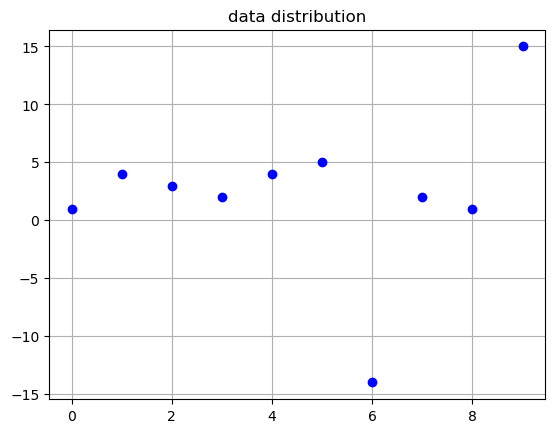

In [25]:
# 시각화로 데이터 분포 확인
plt.plot(dataDF, "bo")
plt.title("data distribution")
plt.grid()
plt.show()

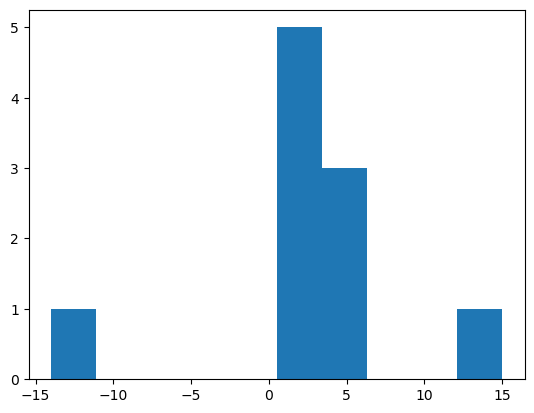

In [26]:
plt.hist(dataDF) #dafault bins = 10
plt.show()

### 2-2. 불필요 데이터 체크 => 결측치, 이상치

In [27]:
# 결측치 
dataDF.isnull().sum()

num    0
dtype: int64

#### 이상치 탐지 - 방법1) 평균과 편차를 이용한 탐지 Z-Score  
z-score = 데이터 - 평균 / 표준편차

In [28]:
mean_value = dataDF.mean()
std_value = dataDF.std()
z_data = (dataDF - mean_value) / std_value

In [29]:
z_data

,num
0,-0.185065
1,0.242008
2,0.099650
3,-0.042707
4,0.242008
5,0.384366
6,-2.320430
7,-0.042707
8,-0.185065
9,1.807942


In [30]:
# 양 끝단 제거를 위한 기준값  => 1.0
threshold = 1.0
mask = z_data.abs() > threshold # boolean mask 

In [31]:
dataDF[~mask]

,num
0,1.0
1,4.0
2,3.0
3,2.0
4,4.0
5,5.0
6,NaN
7,2.0
8,1.0
9,NaN


In [32]:
dataDF[~mask].dropna(inplace=True)

In [33]:
dataDF

,num
0,1
1,4
2,3
3,2
4,4
5,5
6,-14
7,2
8,1
9,15


#### 이상치 탐지 - 방법2) 데이터를 4등분해서 가운데 데이터를 기준으로 이상치 탐지 

In [34]:
q1 = dataDF.quantile(0.25)
q3 = dataDF.quantile(0.75)
iqr = q3-q1

# 이상치로 판단할 기준되는 값
lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)

print(f"q1:{q1}\nq3{q3}\nIQR:{iqr}")
print(f"lower : {lower}\nupper : {upper}")

q1:num    1.25
Name: 0.25, dtype: float64
q3num    4.0
Name: 0.75, dtype: float64
IQR:num    2.75
dtype: float64
lower : num   -2.875
dtype: float64
upper : num    8.125
dtype: float64


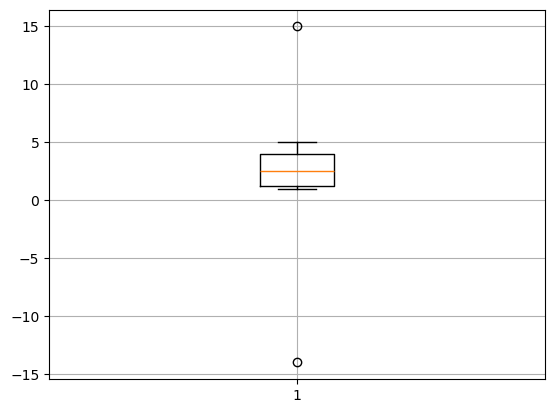

In [35]:
bp_obj = plt.boxplot(dataDF)
plt.grid()
plt.show()

In [36]:
bp_obj # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

{'whiskers': [<matplotlib.lines.Line2D at 0x23659264280>,
 'caps': [<matplotlib.lines.Line2D at 0x236592647c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23659264100>],
 'medians': [<matplotlib.lines.Line2D at 0x23659264cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23659264f70>],
 'means': []}

In [37]:
bp_obj["whiskers"][0] # bp_obj["whiskers"] => list라서 

라인2D get_xdata / get_ydata

In [38]:
# 1qr, 최저치, 3qr, 최대치
bp_obj['whiskers'][0].get_ydata(), bp_obj['whiskers'][1].get_ydata()

(array([1.25, 1.  ]), array([4., 5.]))

In [39]:
bp_obj["whiskers"][0].get_ydata() # 3사분위

array([1.25, 1.  ])

In [40]:
bp_obj["boxes"][0].get_ydata()

array([1.25, 1.25, 4.  , 4.  , 1.25])

In [41]:
dataDF<lower, dataDF>upper

(     num
 0  False
 1  False
 2  False
 3  False
 4  False
 5  False
 6   True
 7  False
 8  False
 9  False,
      num
 0  False
 1  False
 2  False
 3  False
 4  False
 5  False
 6  False
 7  False
 8  False
 9   True)